In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
models = r"./MicroRTS-Py/experiments/models"
graph_map_file = r"graph_map.json"

In [3]:
def get_vectors(experiment):
    if experiment.endswith(".json"):
        file = experiment
    else:
        experiment_dir = os.path.join(models, experiment)
        file = os.path.join(experiment_dir, graph_map_file)
    with open(file, "r") as f:
        graph_map = {k: np.array(v) for k, v in json.load(f).items()}
    return pd.DataFrame(graph_map).transpose()

In [4]:
def draw_pca(experiment, nodes=["main", "unit", "action"]):
    v = get_vectors(experiment)

    fig = plt.figure(1, figsize=(6, 4))
    plt.clf()

    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])

    v = v[v.index.str.startswith(tuple(nodes))]

    plt.cla()
    pca = PCA(n_components=3)
    pca.fit(v)
    X = pca.transform(v)

    y = v.index
    labels = np.empty_like(y)
    for name in nodes:
        labels[y.str.startswith(name)] = name
        ax.text3D(
            X[labels == name, 0].mean(),
            X[labels == name, 1].mean() + X[:, 1].ptp() * 0.1,
            X[labels == name, 2].mean(),
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.3, edgecolor="w", facecolor="w"),
        )
    colors = np.vectorize({"main": "blue", "unit": "green", "action": "red"}.get)(labels)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, cmap=plt.cm.nipy_spectral, edgecolor="k")

    # ax.xaxis.set_ticklabels([])
    # ax.yaxis.set_ticklabels([])
    # ax.zaxis.set_ticklabels([])

    plt.show()

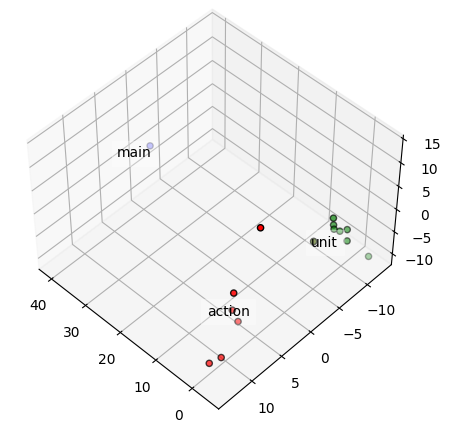

In [84]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg5__23__1725320057")

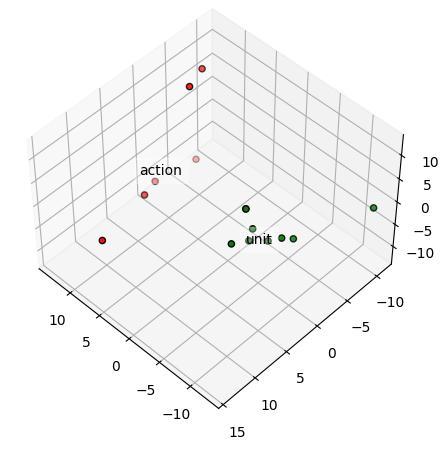

In [81]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg5__23__1725320057", nodes=["unit", "action"])

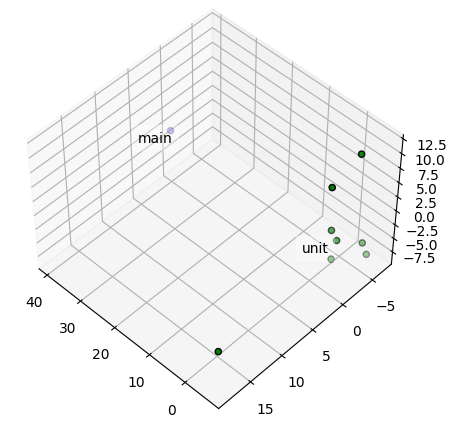

In [78]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg5__23__1725320057", nodes=["main", "unit"])

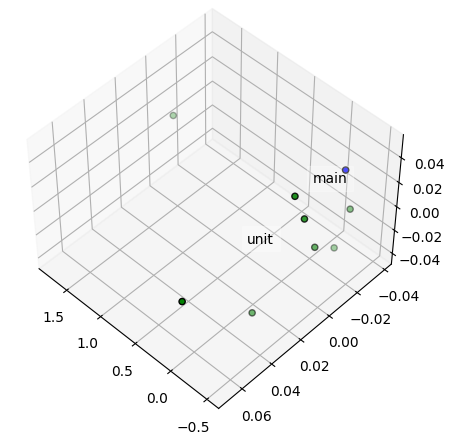

In [79]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg4__22__1725010178", nodes=["main", "unit"])

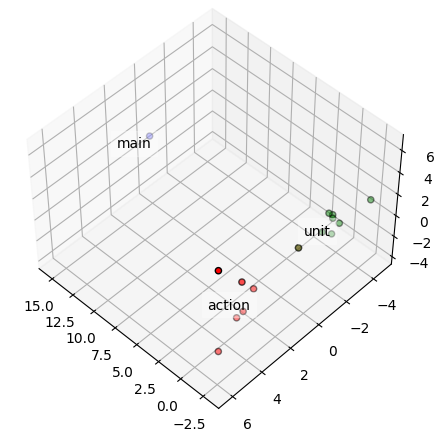

In [85]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725383376")

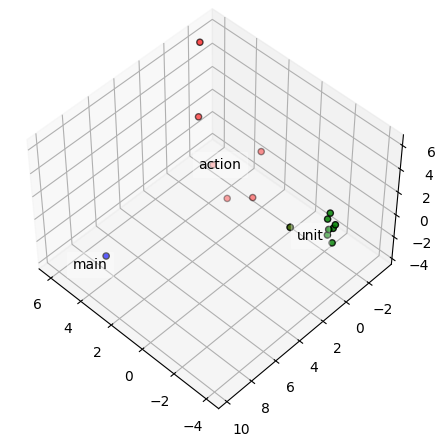

In [87]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725383757")

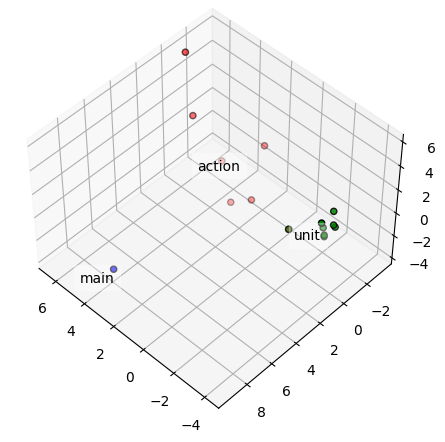

In [5]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725397968")

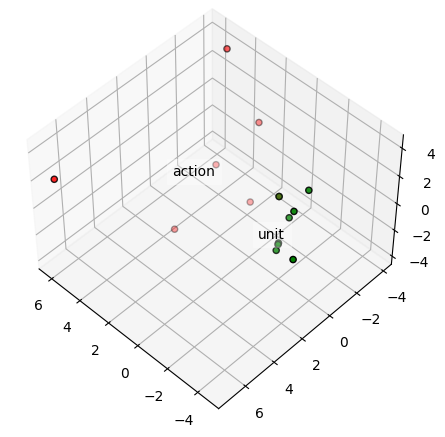

In [88]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725383376", nodes=["unit", "action"])

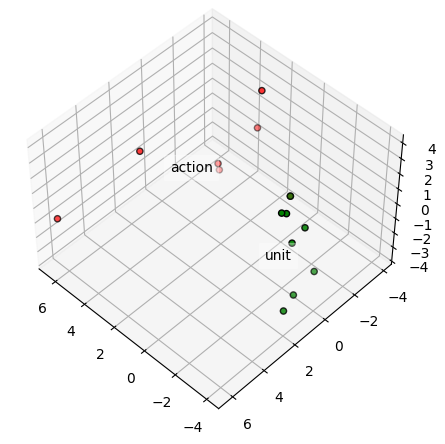

In [92]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725383757", nodes=["unit", "action"])

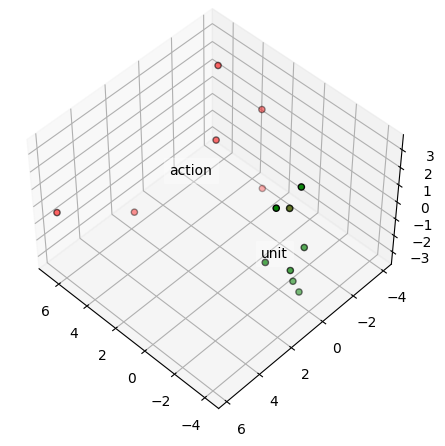

In [7]:
draw_pca(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__test__6__1725397968", nodes=["unit", "action"])